In [80]:
import pandas as pd
points = {'A' :(-9, -3), 'B':(-6, 1), 'C':(-5, 3), 'D' :(0, -1), 'E' :(-8, 0), 'F' :(-2, -1), 'G':(-4, 2), 'H':(-10, -1), 'I':(-4, -2), 'J':(0, -2), 'K':(-7, -4)}
df = pd.DataFrame.from_dict(points, orient= 'index',columns=['x','y'])
df

,x,y
A,-9,-3
B,-6,1
C,-5,3
D,0,-1
E,-8,0
F,-2,-1
G,-4,2
H,-10,-1
I,-4,-2
J,0,-2


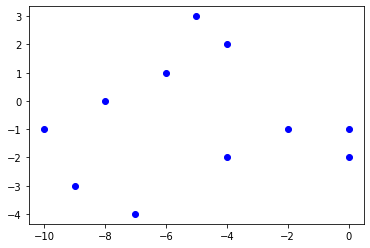

In [ ]:
import matplotlib.pyplot as plt
for index,row in df.iterrows():
  plt.scatter(row['x'], row['y'], c = 'blue')

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

mat = euclidean_distances(df)

euc_matrix = pd.DataFrame(mat, columns = df.index)

# from google.colab import files
# euc_matrix.to_csv('euc_mat.csv')
# files.download('euc_mat.csv')

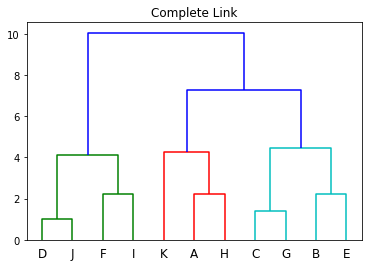

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

dists = squareform(mat)
# After performing complete link analysis manually, we observe that scipy's dendogram gives us the wrong answer for complete link hierarchy
linkage_matrix = linkage(dists, "complete")

dendrogram(linkage_matrix, labels=["A","B","C","D","E","F","G","H","I","J","K"])

plt.title("Complete Link")
plt.show()

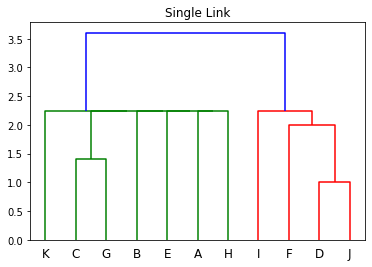

In [83]:
linkage_matrix = linkage(dists, "single")

dendrogram(linkage_matrix, labels=["A","B","C","D","E","F","G","H","I","J","K"])

plt.title("Single Link")
plt.show()

In [78]:
import numpy as np
# Function to determine centroid of a cluster
def find_centroid(df):
  x_sum = df['x'].sum()
  y_sum = df['y'].sum()
  centroid = [x_sum/len(df), y_sum/len(df)]
  return centroid

# Function to find Sum of Squared Error
def SSE(cluster,cent):
  err = 0
  cent1 =  np.array(cent)
  x = euclidean_distances(cluster,cent1.reshape(1,-1)) ** 2
  for val in x:
    err += val
  return err

[-8.5, -2.0] [-4.75, 1.0] [-0.6666666666666666, -1.3333333333333333]
Cluster 1 SSE:  [15.]
Cluster 2 SSE:  [16.75]
Cluster 3 SSE:  [3.33333333]
Total Error  :  [35.08333333]


In [84]:
# SSE for K-Means
cluster_1 = df.iloc[[0,4,7,10]] # AEHK
cluster_2 = df.iloc[[1,2,6,8]] # BCGI
cluster_3 = df.iloc[[3,5,9]] # DFJ

cent_1 = find_centroid(cluster_1)
cent_2 = find_centroid(cluster_2)
cent_3 = find_centroid(cluster_3)

print(cent_1,cent_2,cent_3)

print("Cluster 1 SSE: ", SSE(cluster_1,cent_1))
print("Cluster 2 SSE: ", SSE(cluster_2,cent_2))
print("Cluster 3 SSE: ", SSE(cluster_3,cent_3))

print("Total Error  : ", SSE(cluster_1,cent_1) + SSE(cluster_2,cent_2) + SSE(cluster_3,cent_3))

[-8.5, -2.0] [-4.75, 1.0] [-0.6666666666666666, -1.3333333333333333]
Cluster 1 SSE:  [15.]
Cluster 2 SSE:  [16.75]
Cluster 3 SSE:  [3.33333333]
Total Error  :  [35.08333333]


In [85]:
# SSE for Single Link cluster
cluster_1 = df.iloc[[0,1,2,4,6,7,10]] # ABCEGHK
cluster_2 = df.iloc[[8]] # I
cluster_3 = df.iloc[[3,5,9]] # DFJ

cent_1 = find_centroid(cluster_1)
cent_2 = find_centroid(cluster_2)
cent_3 = find_centroid(cluster_3)

print(cent_1,cent_2,cent_3)

print("Cluster 1 SSE: ", SSE(cluster_1,cent_1))
print("Cluster 2 SSE: ", SSE(cluster_2,cent_2))
print("Cluster 3 SSE: ", SSE(cluster_3,cent_3))

print("Total Error  : ", SSE(cluster_1,cent_1) + SSE(cluster_2,cent_2) + SSE(cluster_3,cent_3))

[-7.0, -0.2857142857142857] [-4.0, -2.0] [-0.6666666666666666, -1.3333333333333333]
Cluster 1 SSE:  [67.42857143]
Cluster 2 SSE:  [0.]
Cluster 3 SSE:  [3.33333333]
Total Error  :  [70.76190476]


In [73]:
# SSE for Complete Link cluster
cluster_1 = df.iloc[[0,4,7,8,10]] #AEHIK
cluster_2 = df.iloc[[1,2,6]] # BCG
cluster_3 = df.iloc[[3,5,9]] #DFJ

cent_1 = find_centroid(cluster_1)
cent_2 = find_centroid(cluster_2)
cent_3 = find_centroid(cluster_3)

print(cent_1,cent_2,cent_3)

print("Cluster 1 SSE: ", SSE(cluster_1,cent_1))
print("Cluster 2 SSE: ", SSE(cluster_2,cent_2))
print("Cluster 3 SSE: ", SSE(cluster_3,cent_3))

print("Total Error  : ", SSE(cluster_1,cent_1) + SSE(cluster_2,cent_2) + SSE(cluster_3,cent_3))

[-7.6, -2.0] [-5.0, 2.0] [-0.6666666666666666, -1.3333333333333333]
Cluster 1 SSE:  [31.2]
Cluster 2 SSE:  [4.]
Cluster 3 SSE:  [3.33333333]
Total Error  :  [38.53333333]
